# Stochastic Gradient Descent for Linear Regression

In [89]:
# Importing NumPy, PyPlot from Matplotlib, import-ipynb to import IPython Notebooks & gradientDescent notebook
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import gradientDescent as gd

## Defining function for implementing Stochastic Gradient Descent using standard Gradient Descent

In stochastic gradient descent, parameters are optimised with a batch of data points. This improves the execution time by saving up on gradient calculations as now, only a subset of data points are used for the same in one iteration. So, standard gradient descent can be used to compute weight vector for every iteration with `init_` as weight vector computed in last iteration and `n_iter` as 1. This gives the optimum weights for the batch processed in that iteration.

In [90]:
def stochastic_gradient_descent(X, y, gradient, init_, learn_rate, n_iter=10, batch_size=20, tol=1e-6):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    gradient = Function which gives the gradient of the loss function for some values of weights
    init_ = Initial value of weights
    learn_rate  = Learnig rate parameter which controls how much the weights change at each iteration
    n_iter = Maximum number of iterations
    batch_size = Size of a batch. 0 < batch_size <= total num of data points
    tol = Tolerance limit at which alogrithm stops

    Returns optimal weight vector & error(loss) history
    '''

    # Total number of data points 
    n = len(y)

    # Initialising weight vector with init_ and empty error list to record loss after every iteration
    w = init_
    error_list = []
    
    for _ in range(n_iter):
        # Randomizing the data points for every iteration by shuffling the indices
        indices = np.arange(n)
        np.random.shuffle(indices)  
        X = X[indices]
        y = y[indices]

        # Making mini batches for current iteration by considering first m data points from the shuffled arrays where m = batch size
        X_mini = X[:batch_size]
        y_mini = y[:batch_size]

        # Computing the new weights by passing the weight vector of previous iteration to standard gradient descent function as initial weight vector & n_iter = 1
        updated_w, _ = gd.gradient_descent(X=X_mini, y=y_mini, gradient=gradient, init_=w, learn_rate=learn_rate, n_iter=1, tol=tol)
            
        # Tolerance check
        if np.all(np.abs(w - updated_w) <= tol):
            break

        # Updating the weight vector with new weights
        w = updated_w

        # Calculating Mean Squared Error at current values of parameters and adding it to history
        error_list.append(gd.loss(X_mini, y_mini, w))
        
    # Returns final weight vector computed and error history list
    return np.round(w*1000)/1000, error_list

## Generating artificial training data for SGD linear regression model

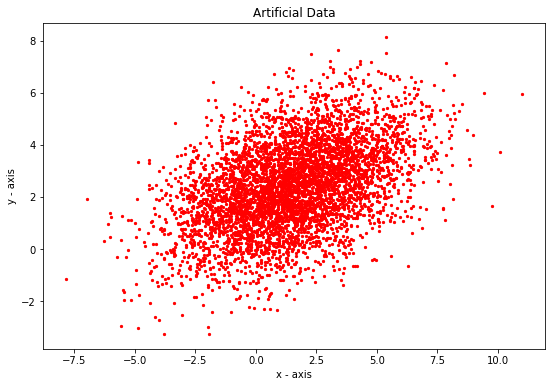

In [91]:
np.random.seed(0)

# Initialising an array of 5000 values with mean = 1.5 & standard deviation = 2.5
X = 2.5 * np.random.randn(5000) + 1.5

# Generating 5000 residual terms
res = 1.5 * np.random.randn(5000)

# Actual values of y
y = 2 + 0.3 * X + res

# Plotting the points generated
plt.figure(figsize=(9,6))
plt.scatter(X, y, marker='.', s=20, color='r')
plt.title('Artificial Data')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.show()

## Training the model on data generated (X, y)

Optimal parameters a and b relating X and y are 0.301 and 1.978


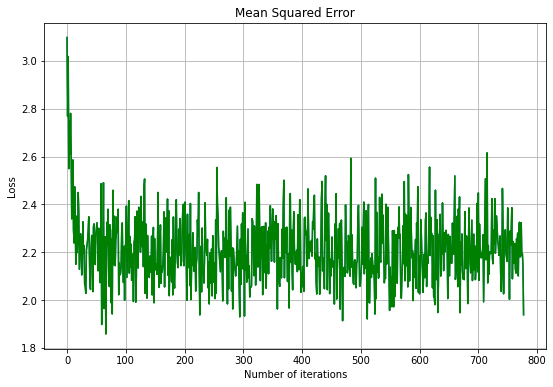

In [111]:
# Passing random initial parameter values, learning rate as 0.05, batch size as 512 and number of iterations as 5000
w, error_list_sgd = stochastic_gradient_descent(X, y, gd.gradient, init_=np.random.rand(2), learn_rate=0.05, batch_size=512, n_iter=5000)

print('Optimal parameters a and b relating X and y are', w[0], 'and', w[1])

# Visualising loss function for SGD
plt.figure(figsize=(9,6))
plt.plot(error_list_sgd)
plt.title('Mean Squared Error')
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.plot(error_list_sgd, color='g')
plt.show()

## Plotting the linear function for parameters obtained

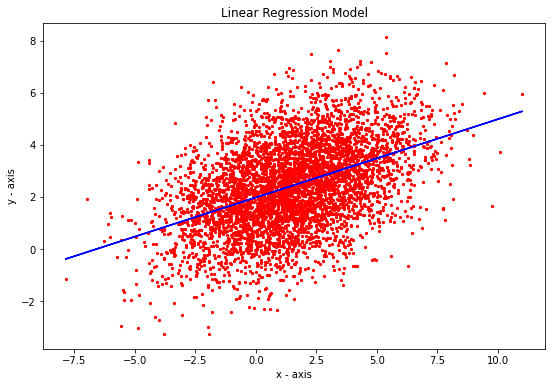

In [112]:
## Plotting the linear function for parameters obtained
plt.figure(figsize=(9,6))
plt.title('Linear Regression Model')
plt.xlabel('x - axis')
plt.ylabel('y - axis')

# Plotting the values of y against X
plt.scatter(X, y, marker='.', s=20, color='r')

# Plotting the linear function with optimal parameters for X and y
plt.plot(X, (lambda x: w[0]*x + w[1])(X), color='b')

plt.show()